# Помощь в принятии решений для крупного интернет-магазина

На основе данных интернет-магазина приотезировать гипотезы для увеличения выручки, которые были подготовлены вместе с отелом маркетинга, и произвести оценку результатов A/B-тестирования различными методами.

***Задачи проекта***
- Приоритизация гипотез
- Запуск A/B-тест 
- Анализ результатов

***Цель проекта***
- Выбрать подходящие гипотезы


In [1]:
#импорт нужных библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as stats
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings("ignore")

## Приоритизация гипотез

In [2]:
data = pd.read_csv('hypothesis.csv')
pd.set_option("max_colwidth", 120)
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Применяю фреймворк ICE для приоритезации гипотез. Для этого воспользуюсь формулой: 

$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [3]:
data['ICE'] = round((data['Impact'] * data['Confidence']) / data['Efforts'], 3)

In [4]:
data.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000


Всего было 9 гипотез, для удобства будем считать от 0 до 8 (как записаны индексы)

Наиболее перспективные гипотезы по ICE: 8, 0, 7

In [5]:
print(data['Hypothesis'][8])
print(data['Hypothesis'][0])
print(data['Hypothesis'][7])

Запустить акцию, дающую скидку на товар в день рождения
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок


Применение фреймворка RICE для приоритезации гипотез. Для этого воспользуюсь формулой:

$$RICE = \frac{Reach * Impact * Confidence} {Efforts} $$

In [6]:
data['RICE'] = (data['Reach'] * data['Impact'] * data['Confidence']) / data['Efforts']
data.sort_values(by = 'RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000,3.0


Наиболее преспективные гипотезы по RICE: 7,2, 0 и 6

In [7]:
print(data['Hypothesis'][7])
print(data['Hypothesis'][2])
print(data['Hypothesis'][0])
print(data['Hypothesis'][6])

Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию


***Вывод***

Наиболее перспективные гипотезы по ICE:
- 1) Запустить акцию, дающую скидку на товар в день рождения (8)
- 2) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0)
- 3) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок(7)

Наиболее перспективные гипотезы по RICE:
- 1) Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7)
- 2) Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа(2)
- 3) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0) и Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (6)

По двум фреймфоркам можно выделить гипотезы (которые совпадают) 7 и 0. Также стоит обратить внимание на гипотезу 8. Все значительно поменялось при введение параметра вовлеченности аудитории (Reach), где это большой показатель, тот и изменил результаты по фреймворку ICE. 

Стоит обратить внимание помимо гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"(7) и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"(0) на гипотезу "Запустить акцию, дающую скидку на товар в день рождения" (8), так как очень высокие показатели влияния пользователей (Impact = 9) и уверенности в результате (Confidence = 9).

## Анализ A/B-теста

In [8]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [9]:
orders['date'] = pd.to_datetime(orders['date']).dt.date
visitors['date'] = pd.to_datetime(visitors['date']).dt.date

In [10]:
print(orders[orders['group'] == 'A']['visitorId'].count())
print(orders[orders['group'] == 'B']['visitorId'].count())

557
640


***Описание А/В- теста***

В исследовании буду использовать две группы: А и В.\
Дата начала теста 1 августа 2019 года, дата окончания теста 1 сентября 2019.\
В группе "А" 557 пользователей, а в курсе "В" 640 пользователей.

### Построение графика кумулятивной выручки (накапливаемых данных) по группам

In [11]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]\
                                    .agg({'date' : 'max',
                                          'group' : 'max',
                                          'transactionId' : 'nunique',
                                          'visitorId' : 'nunique',
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                     visitors['group'] == x['group'])]\
                                    .agg({'date' : 'max',
                                          'group' : 'max',
                                          'visitors' : 'sum'}), axis=1).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on = ['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


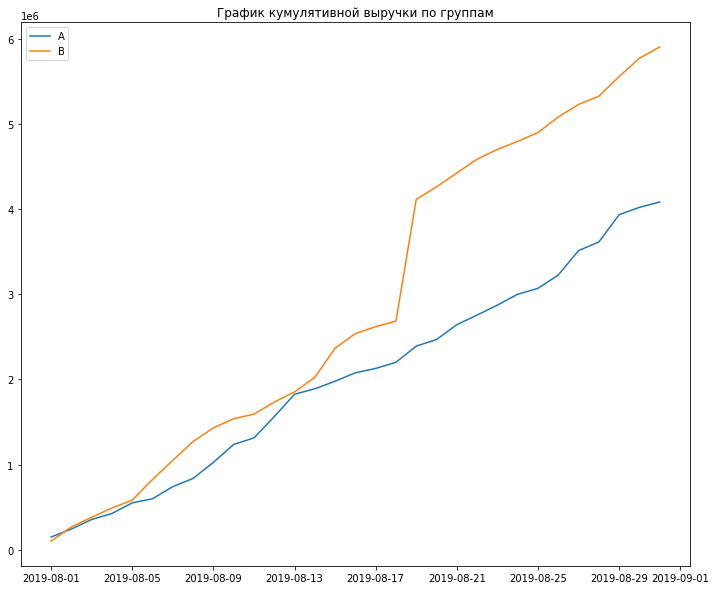

In [12]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]

plt.figure(figsize = (12,10))
plt.title('График кумулятивной выручки по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend();


***Вывод***

Выручка равномерно увеличивается на протяжении всего теста. Группа А равномерно увеличивается на всем протяжении теста, а группа В имеет резкий скачок(17-21 августа), что может свидетельствовать о всплеске числа заказов или о появлении очень дорогих заказов в выборке.


### Построение графика кумулятивного среднего чека по группам

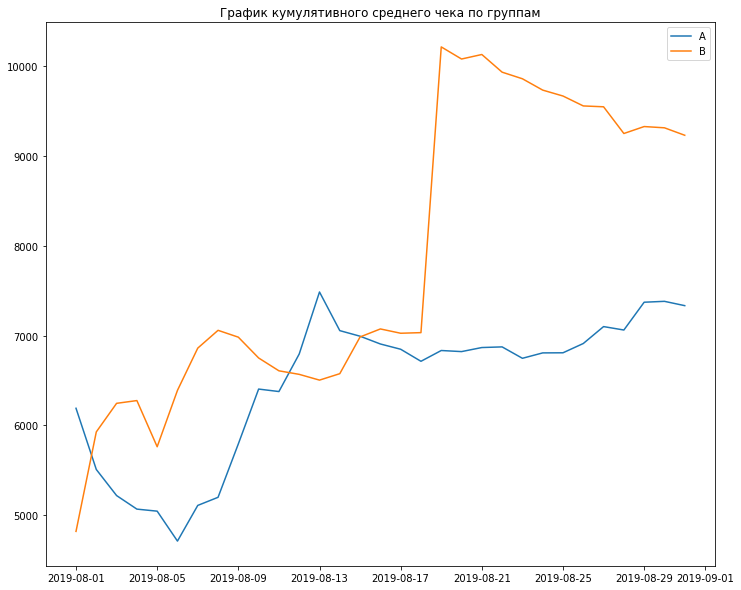

In [13]:
plt.figure(figsize = (12,10))
plt.title('График кумулятивного среднего чека по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/ cumulativeRevenueB['orders'], label='B')

plt.legend();

***Вывод***

Средний чек для группы А сначала резко упал, потом резко стал возрастать и к концу стал равномерным.\
Падение группы А может быть связано с маленьким количеством заказов в этот период (5-9 августа), потом все нормализовалось.\
Средний чек для группы В возрастал, потом был резкий рост (17-21 августа), потом чуть-чуть упал.\
Резкий рост может быть связан с крупными заказами клиентов.

Средний чек для двух групп неравномерный, присутствует и всплески, и падения. 

### Построение графика относительного измерения кумулятивного среднего чека группы В к группе А.

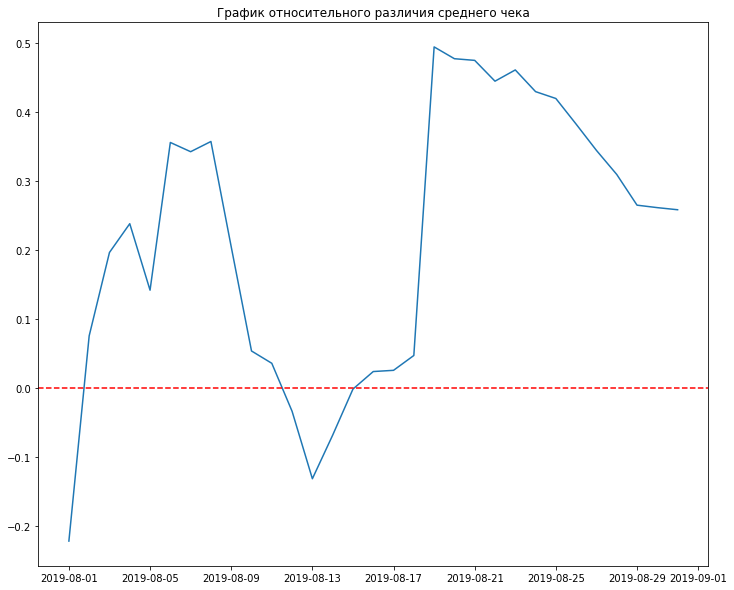

In [14]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on = 'date', right_on = 'date',
                                                  how = 'right', suffixes=['A', 'B'])

plt.figure(figsize = (12,10))
plt.title('График относительного различия среднего чека')
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/
                                          mergedCumulativeRevenue['ordersB']) / 
                                           (mergedCumulativeRevenue['revenueA']/
                                           mergedCumulativeRevenue['ordersA']) - 1)

plt.axhline(y=0, color='red', linestyle='--');

***Вывод***

В нескольких точках графика различия между сегментами резко скачет. Есть падение где-то 13 августа, и два резких всплеска: первый где-то 5-9 августа и второй где-то 17-21 августа. Такие всплески могут быть связаны с какими-то выбросами или крупными заказами.

### Построение графика кумулятивноо среднего количества заказов на посетителя (конверсии) по группам

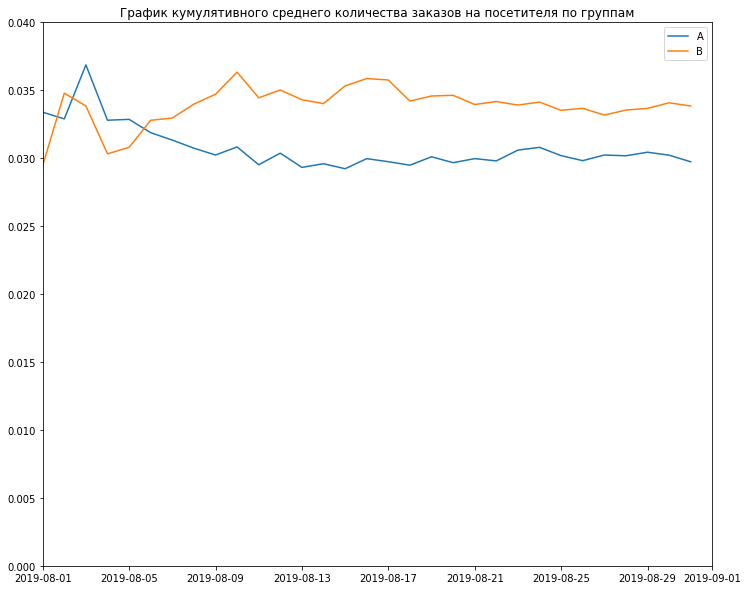

In [15]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']

cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

plt.figure(figsize=(12,10))
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label = 'B')
plt.legend()
plt.axis([dt.datetime(2019, 8 , 1), dt.datetime(2019, 9, 1), 0, 0.04]);

***Вывод***

- В начале теста группа А имела большую конверсию, но постепенно сегмент В выровнялся и примерно зафиксировался около значения больше А.
- В начале всплеск для группы А, а потом  спад в количестве заказов, в конце спад стабилизировался. 
- Для группы В тоже произошел небольшой спад вначале, но потом был подъём в среднем количестве заказов.
- Потом график стабилизировался. 
- Решающий период (когда группа А просела, а группа В вырвалась вперед) это с 5-9 августа. 
- Колебания абсолютного значения в начале и в конце теста не слишком большое: где-то 1-2%.

### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А

No handles with labels found to put in legend.


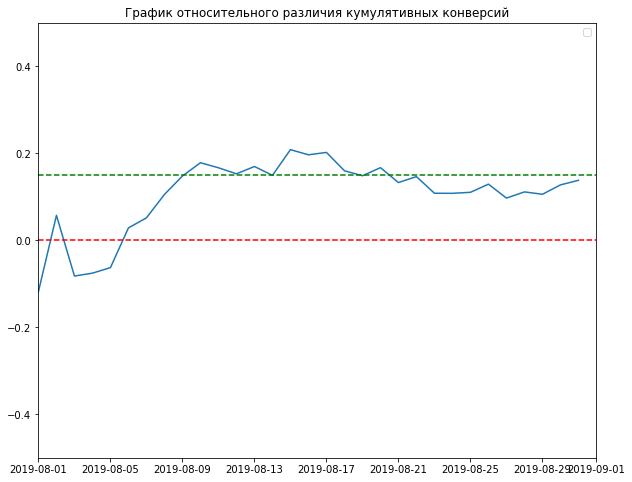

In [16]:
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']],
                                                                           left_on='date',
                                                                           right_on = 'date',
                                                                           how = 'left',
                                                                           suffixes=['A', 'B'])


plt.figure(figsize=(10,8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
        mergedCumulativeConversions['conversionA'] - 1)
plt.title('График относительного различия кумулятивных конверсий')
plt.legend()
plt.axhline(y = 0, color='red', linestyle='--')
plt.axhline(y = 0.15, color='green', linestyle='--')
plt.axis([dt.datetime(2019, 8 , 1), dt.datetime(2019, 9, 1), -0.5, 0.5]);

***Вывод***

Почти с самого начала теста группа В лидирует по конверсии относительно группы А, только в конце слегка опускается (но не ниже 10%).

### Построение точечного графика стоимостей заказов 

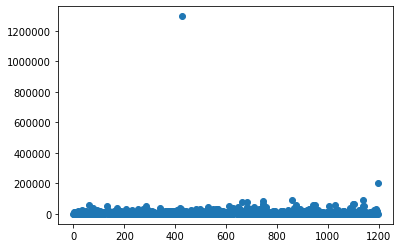

In [17]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.ticklabel_format(style='plain')
plt.scatter(x_values, orders['revenue']);

***Вывод***

По графику видно выброс (или аномально дорогой заказ, что маловероятно) в 1200000. Надо исключить это значение и построить график без него.

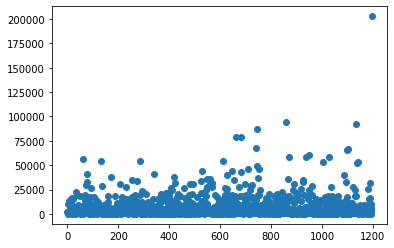

In [18]:
orders_1 = orders[orders['revenue']< 300000]
x_values = pd.Series(range(0, len(orders_1['revenue'])))
plt.ticklabel_format(style='plain')
plt.scatter(x_values, orders_1['revenue']);

***Вывод***

Большинство заказов до 25000. По графику можно выбрать границу аномальных заказов между 50000 и 100000.

### Подсчёт перцентилей стоимости заказов

In [19]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


***Вывод***

Получается не более 5% заказов дороже 28000 и не более 1% дороже 58233 рублей. За верхнюю границу стоимости заказов можно взять 28000 рублей.

### Построение точечного графика количества заказов по пользователям 

In [20]:
#создание таблицу, где будем количество заказов для каждого пользователя
orders_user= orders.groupby('visitorId').agg({'transactionId' : 'nunique'})
orders_user.sort_values(by='transactionId', ascending=False)

,transactionId
visitorId,
4256040402,11
2458001652,11
2378935119,9
2038680547,8
199603092,5
...,...
1484903144,1
1485964287,1
1494664757,1


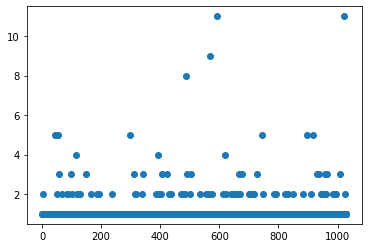

In [21]:
x_values = pd.Series(range(0,len(orders_user['transactionId'])))
plt.scatter(x_values, orders_user['transactionId']);

***Вывод***

По графику видно, что есть немного пользователей с большим количеством заказов. Много пользователей с 2-4 заказами.

### Подсчёт перцентилей количества заказов на пользователя

In [22]:
print(np.percentile(orders_user['transactionId'], [90, 95, 99]))

[1. 2. 4.]


***Вывод***

Не более 5% пользователей сделали более 2 заказов и не более 1% оформили более 4 заказов. За верхнюю границу можно выбрать 2 или 3 заказов на одного пользователя.

***Вывод***

Для определения аномальных пользователей возьмем верхнюю границу: 
- 2/3 заказа на одного пользователя
- 28000 стоимости заказов


### Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по "сырым" данным

In [31]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [23]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [24]:
orders_userA = (orders[orders['group'] == 'A'].groupby('visitorId', as_index=False)\
               .agg({'transactionId' : 'nunique'}))

orders_userA.columns = ['visitorId', 'orders']

orders_userB = (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False)\
               .agg({'transactionId' : 'nunique'}))

orders_userB.columns = ['visitorId', 'orders']

In [25]:
sampleA = pd.concat(
    [orders_userA['orders'],
    pd.Series(0, index=np.arange(
        data['visitorsPerDateA'].sum() - len(orders_userA['orders'])
    ), name='orders')], axis=0,
)

sampleB = pd.concat(
    [orders_userB['orders'],
    pd.Series(0, index=np.arange(
        data['visitorsPerDateB'].sum() - len(orders_userB['orders'])
    ), name='orders')], axis=0,
)

Нулевая гипотеза: различий в среднем числе заказов между группами нет.

Альтернативная гипотеза: различия в среднем числе заказов между группами есть.

In [26]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB,alternative="two-sided")[1]))
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() -1))

0.017
0.138


***Вывод***

P-value меньше 0.05, значит есть статистически значимые отличия между средним числом заказов двух групп. Получается, нулевую гипотезу опровергаю. Относительное различие среднего количества заказов между сегментами 13.8%, то есть группа В на почти 14% превосходит группу А в среднем количестве заказов.

### Подсчет статистической значимости различий в среднем чеке заказа между группами по "сырым" данным.

Нулевая гипотеза: различий в среднем чеке  между группами нет.

Альтернативная гипотеза: различия в среднем чеке заказов между группами есть.

In [27]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'],
                                         alternative="two-sided")[1]))

print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean() / 
                       orders[orders['group']=='A']['revenue'].mean() -1))

0.729
0.259


***Вывод***

P-value значительно больше 0.05. Не отвергаю нулевую гипотезу. Значит, в среднем чеке статистически значимых отличий между группами нет. Средний чек группы В на почти 26% больше среднего чека группы А.

Пусть аномальными пользователями будут:
- пользователь совершивший не более 2 заказов 
- покупка не превысила 28000 рублей


### Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по "очищенным" данным

Нулевая гипотеза: различий в среднем числе заказов между группами нет.

Альтернативная гипотеза: различия в среднем числе заказов между группами есть.

In [28]:
users_max_orders = pd.concat(
    [orders_userA[orders_userA['orders'] > 2]['visitorId'],
    orders_userB[orders_userB['orders'] > 2]['visitorId'],],axis=0
)

users_rich_orders = orders[orders['revenue'] > 28000]['visitorId']

abnormalUsers = (pd.concat([users_max_orders, users_rich_orders], axis = 0).drop_duplicates().sort_values())

sampleAFiltred = pd.concat([orders_userA[np.logical_not(orders_userA['visitorId'].isin(abnormalUsers))]['orders'],
                           pd.Series(0, 
                                     index=np.arange(data['visitorsPerDateA'].sum() - len(orders_userA['orders'])),
                                     name='orders',
                                    ),
                           ],
                           axis = 0)

sampleBFiltred = pd.concat([orders_userB[np.logical_not(orders_userB['visitorId'].isin(abnormalUsers))]['orders'],
                           pd.Series(0, 
                                     index=np.arange(data['visitorsPerDateB'].sum() - len(orders_userB['orders'])),
                                     name='orders',
                                    ),
                           ],
                           axis = 0)

In [29]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltred, sampleBFiltred,alternative="two-sided")[1]))
print('{0:.3f}'.format(sampleBFiltred.mean() / sampleAFiltred.mean()-1))

0.013
0.173


***Вывод***

Результаты по среднему количеству заказов между группами практически не изменились. То есть различия в среднем числе заказов между группами есть(p-value < 0.05)

### Подсчет статистической значимости различий в среднем чеке заказа между группами по "очищенным" данным.

Нулевая гипотеза: различий в среднем чеке  между группами нет.

Альтернативная гипотеза: различия в среднем чеке заказов между группами есть.

In [30]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'], alternative="two-sided",
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


***Вывод***

P-value остался почти таким же. То есть нулевую гипотезу не отвергаю.  А вот средний чек группы В стал меньше, чем средний чек группы А на 2%

### Итоговый вывод результатов теста

Имеющиеся факты:
- Есть отличия по среднему количеству заказов и по "сырым", и по "очищенным" данным. Группа В превосходит группу А на 14% по "сырым" данным, и на 17% по "очищенным" данным.
- Нет статистически значимого различия по среднему чеку между группами  по "сырым" данным. После фильтрации аномалий значение p-value не изменилось, а средний чек группы В стал меньше на 2% по сравнению с группой А.
- График различия среднего чека показывает, что результаты группы В лучше, чем группы А, т.е. группа В выше по среднему чеку группы А.
- График различия среднего количества заказов между группами (конверсии) показывает, что В превосходит группу А по среднему количеству заказов.

Тогда можно сделать вывод, что
Надо остановить тест, признать победу группы В.

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

Лиза, спасибо за твой проект! Ты приложила много усилий, чтобы довести его до конца, все задачи в рамках проекта тебе удалось успешно решить, это видно невооруженным глазом, отличная работа! У меня есть несколько рекомендаций, над которыми стоит поработать.

**Отмечу отдельные положительные моменты проекта🙂**:
* На разных шагах проекта ты предлагала очень интересные решения и методы для их реализации. Хорошая работа!
* Ты активно работала с визуализацией, хорошо, что ты используешь графики в работе над проектами!
* Тест для проверки гипотез выбран верно, интерпретация результатов теста также корректна:)
* Проект в целом хорошо структурирован и оформлен, это плюс:)

    
**На что стоит обратить внимание:🙂**:

* Важно сформулировать гипотезы перед проведением каждого из тестов.
* Попробуй найти пользователей, попавших в обе группы.
* Можно поработать над комментариями в желтых блоках, носящих рекомендательный характер.
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
![gif](https://media.giphy.com/media/l41Yh1olOKd1Tgbw4/giphy.gif)

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту: вторая итерация ревью**

Лиза, спасибо, что прислала проект с доработками! Все основные моменты исправлены и скорректированы, хорошая работа! 
    
Спешу тебе сообщить, что твой проект принят и ты можешь перейти на следующий спринт🐱‍🏍
    
Желаю тебе крутых и интересных проектов на следующих спринтах🙌😉